In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve,  classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import RobustScaler,StandardScaler
from imblearn.over_sampling import SMOTE

In [359]:
df = pd.read_csv("/Users/sima/Desktop/Springboard/excercise/creditcard.csv")

In [360]:
#In this dataset, we are trying to detect credit card fraud
# data contains only numerical values which are the result of PCA 
# transformation

In [361]:
df.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [362]:
df.shape

(284807, 31)

In [363]:
# we can see that our data is highly unbalanced, the ratio of fraud
# transactions compare to non-fraud ones is 0.001 to 0.99 

In [364]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [365]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [366]:
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [367]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
# it can be seen in our heatmap that many of the features have very
# little (if any) correlation with our class feature, so I went ahead 
# dropped them

<AxesSubplot:>

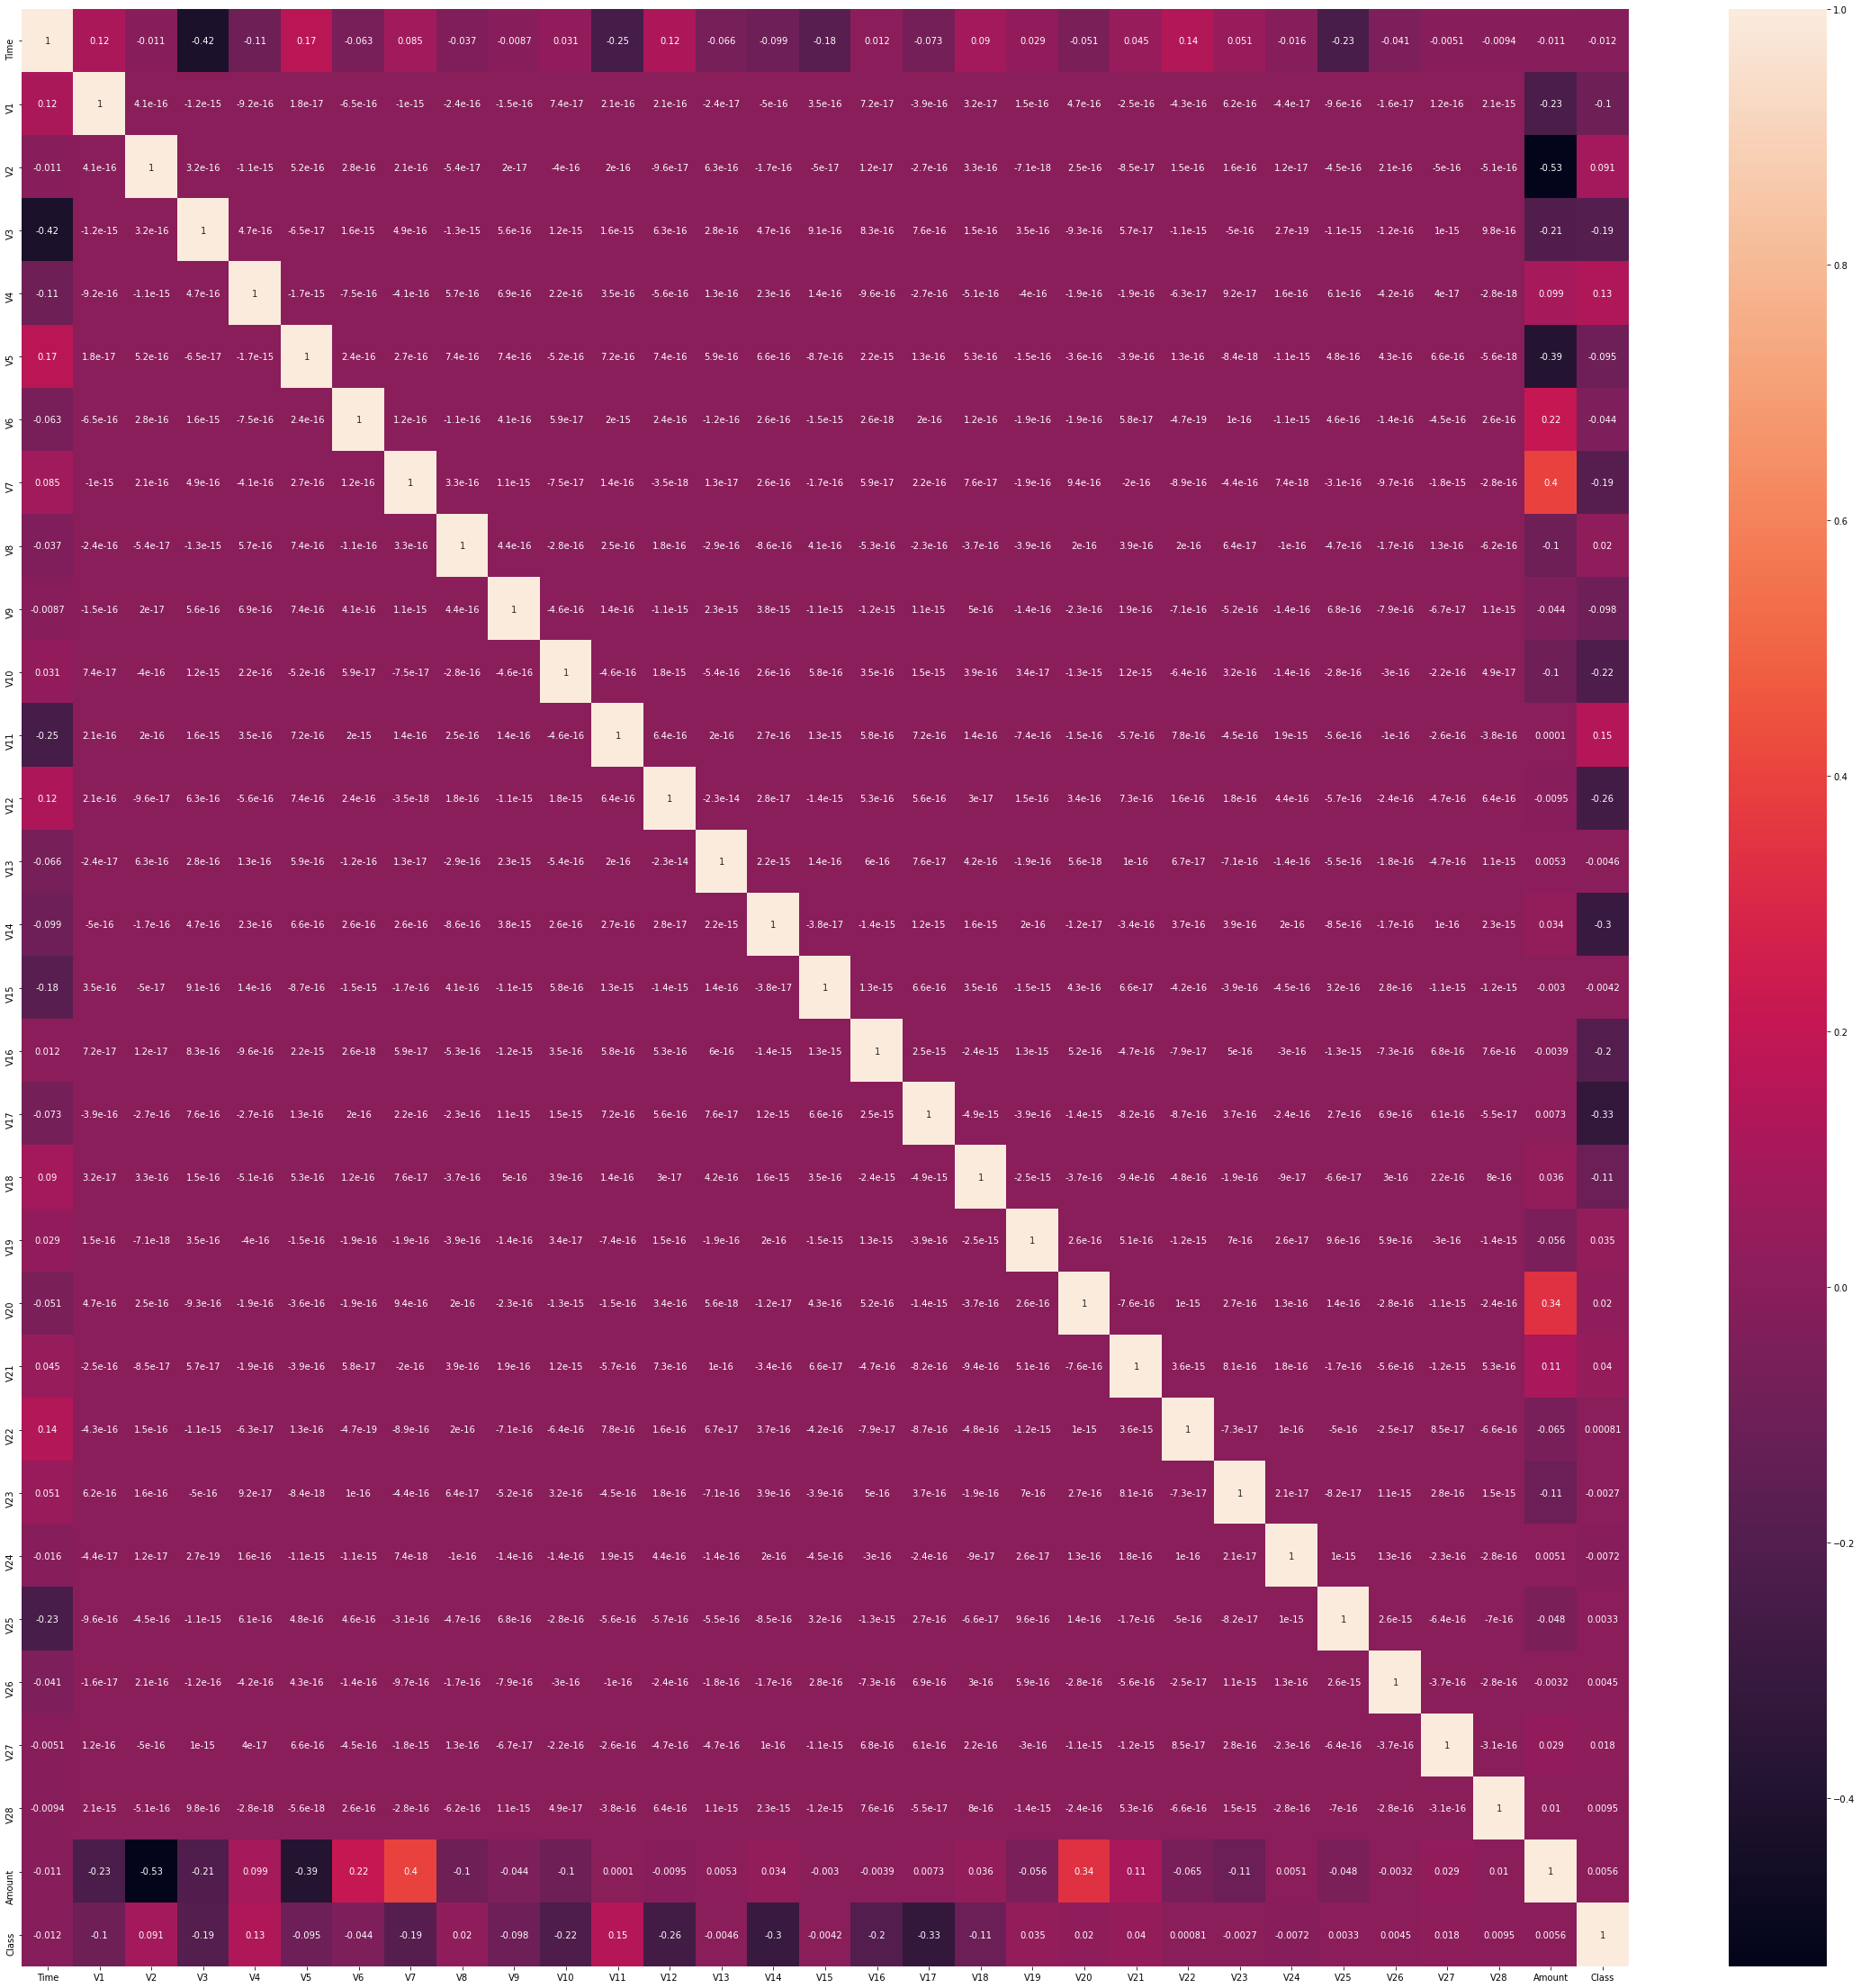

In [13]:
plt.figure(figsize = (40, 40))
sns.heatmap(df.corr(), annot=True)

In [368]:
columns_to_drop = ['V19','V20','V21','V22', 'V23','V24', 'V25', 'V26', 'V27', 'V28'] 
df = df.drop(columns_to_drop, axis=1)

In [369]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [370]:
# to aquire more accurate and fast machine learning models, I use minmaxscaler
# to scale the 'Amount' feature

In [371]:
st = StandardScaler()
df['Amount'] = st.fit_transform(df['Amount'].values.reshape(-1,1))

In [372]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,-0.313249,0


In [373]:
X = df.drop('Class', axis=1)
y = df['Class']

In [374]:
y.shape

(284807,)

In [ ]:
# I used 4 different machine learning algorithm to find the best score,
# since our data is vhighly unbalanced, finding the accuracy score many 
# not help us to find the best model.
# in this particular case, our goal is to reduce the False negative (Recall)
# rate, we need to find the model with the lowest false negative rate
# we can see that DecisionTreeClassifier gave us the lowest number of 
# False negative, which is 24, but can we do better?


In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [376]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
log_acc

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9990309260975815

In [377]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71056    28]
 [   41    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71084
           1       0.73      0.65      0.69       118

    accuracy                           1.00     71202
   macro avg       0.87      0.83      0.85     71202
weighted avg       1.00      1.00      1.00     71202



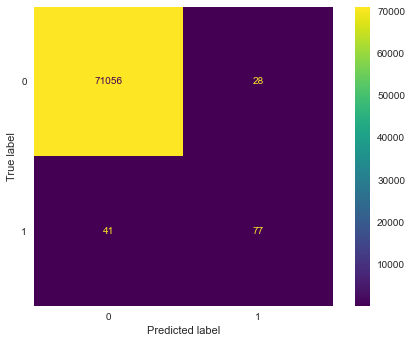

In [378]:
plot_confusion_matrix(lr, X_test, y_test)
plt.grid(False)

In [379]:
rf = RandomForestClassifier(criterion='entropy', max_depth=7)
rf_model = rf.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y_pred)

In [380]:
print(rf_acc)

0.9995505744220669


In [381]:
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[71079     5]
 [   27    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71084
           1       0.95      0.77      0.85       118

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



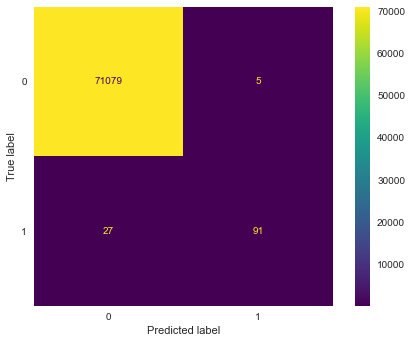

In [382]:
plot_confusion_matrix(rf, X_test, y_test)
plt.grid(False)

In [383]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)

In [384]:
print(dt_acc)


0.9991854161399961


In [385]:
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

[[71056    28]
 [   30    88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71084
           1       0.76      0.75      0.75       118

    accuracy                           1.00     71202
   macro avg       0.88      0.87      0.88     71202
weighted avg       1.00      1.00      1.00     71202



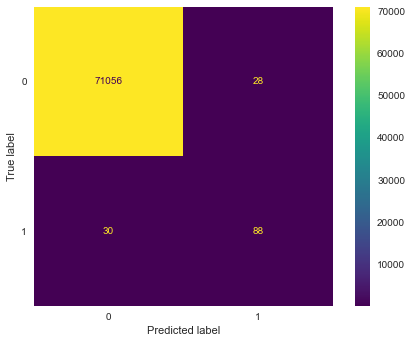

In [387]:
plot_confusion_matrix(dt, X_test, y_test)
plt.grid(False)

In [388]:
xgb = XGBClassifier()
model_xgb = xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(xgb_accuracy )

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:17:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9995365298727564


In [389]:
print(confusion_matrix(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))

[[71075     9]
 [   24    94]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71084
           1       0.91      0.80      0.85       118

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



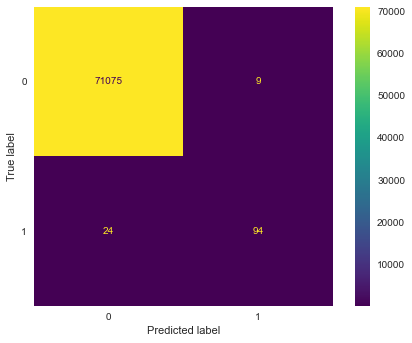

In [391]:
plot_confusion_matrix(xgb, X_test, y_test)
plt.grid(False)

In [ ]:
# In the next section I tried to make our data balanced, 
# doing oversampling by using SMOTE and retried all 4 models on our 
# balanced data
# we can see that the oversampling made our LogisticRegression model
# worse that before, but we made improvement on all the other ones
# I have picked RandomForestClassifier as my best model with lowest
# False negative rate of zero

In [392]:
smt = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
X_smote, y_smote = smt.fit_resample(X, y)

In [393]:
y_smote.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote)

In [395]:
lr_smt = LogisticRegression()
lr_smt_model = lr_smt.fit(X_train, y_train)
lr_smt_y = lr_smt_model.predict(X_test)
r_smt__acc = accuracy_score(y_test, lr_smt_y)


/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [396]:
print(r_smt__acc)

0.9740640695564091


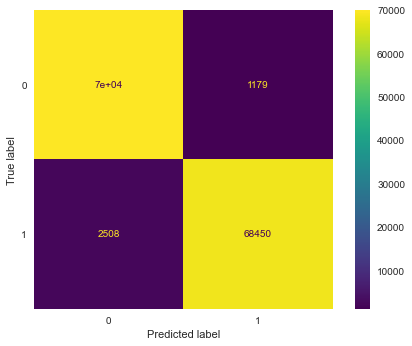

In [397]:
plot_confusion_matrix(lr_smt, X_test, y_test)
plt.grid(False)

In [398]:
rf_smt = RandomForestClassifier(n_estimators=100)
rf_smt_model = rf_smt.fit(X_train, y_train)
rf_smt_y = rf_smt_model.predict(X_test)
rf_smt_acc = accuracy_score(y_test, rf_smt_y)


In [399]:
print(rf_smt_acc)

0.999866345896819


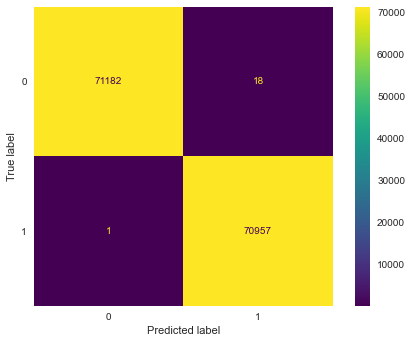

In [400]:
plot_confusion_matrix(rf_smt, X_test, y_test)
plt.grid(False)

In [401]:
dt_smt = DecisionTreeClassifier()
dt_smt_model = dt_smt.fit(X_train, y_train)
dt_smt_y = dt_smt_model.predict(X_test)
dt_smt_acc = accuracy_score(y_test, dt_smt_y)

In [402]:
print(dt_smt_acc)

0.9985298048650093


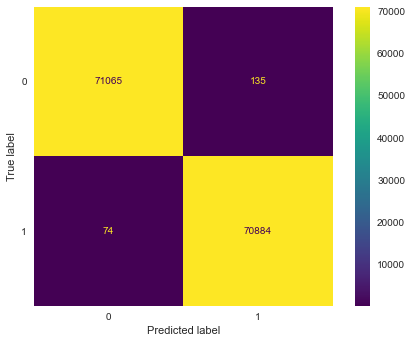

In [403]:
plot_confusion_matrix(dt_smt, X_test, y_test)
plt.grid(False)

In [404]:
xgb_smt = XGBClassifier()
xgb_smt_model = xgb_smt.fit(X_train, y_train)
xgb_smt_y = xgb_smt_model.predict(X_test)
xgb_smt_accuracy = accuracy_score(y_test, xgb_smt_y)
print(xgb_accuracy )

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:25:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9995365298727564


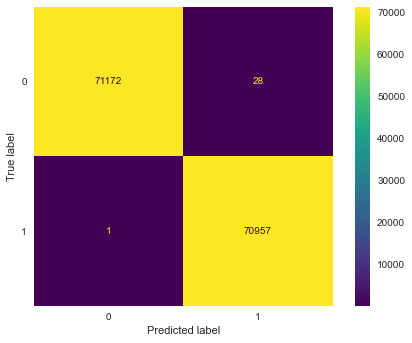

In [405]:
plot_confusion_matrix(xgb_smt, X_test, y_test)
plt.grid(False)

<AxesSubplot:>

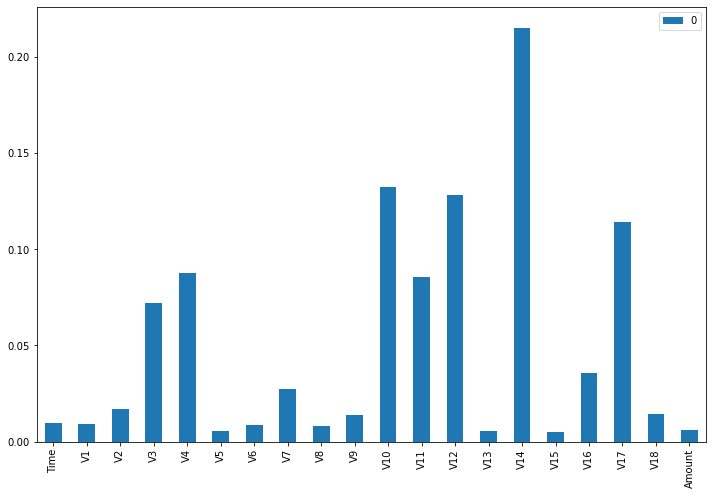

In [220]:
pd.DataFrame(rf_smt_model.feature_importances_, index=X_smote.columns).plot.bar(figsize=(12, 8))

In [ ]:
# In this section I wanted to compare the ROC-curve of all 4 models,
# it can be seen that LogisticRegression model has a slightly smaller
# area under the curve, compare to all of the other models. Our best model
# is the one that has the largest under the curve area!

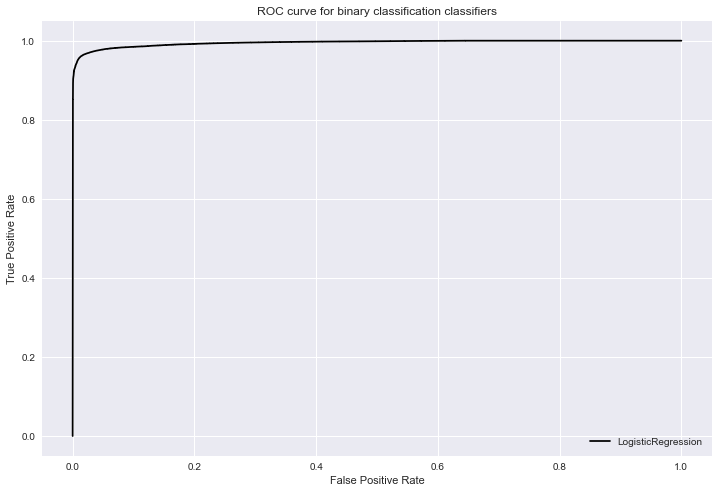

In [259]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,8))

plot_roc_curve(lr_smt, X_test, y_test, color='black',ax = ax, label='LogisticRegression')
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for binary classification classifiers')
plt.show()

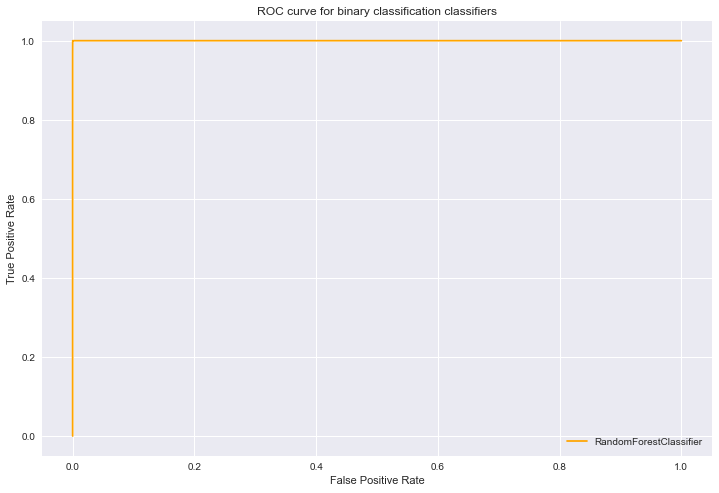

In [230]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,8))
plot_roc_curve(rf_smt, X_test, y_test, color='orange',ax = ax, label='RandomForestClassifier')

ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for binary classification classifiers')
plt.show()

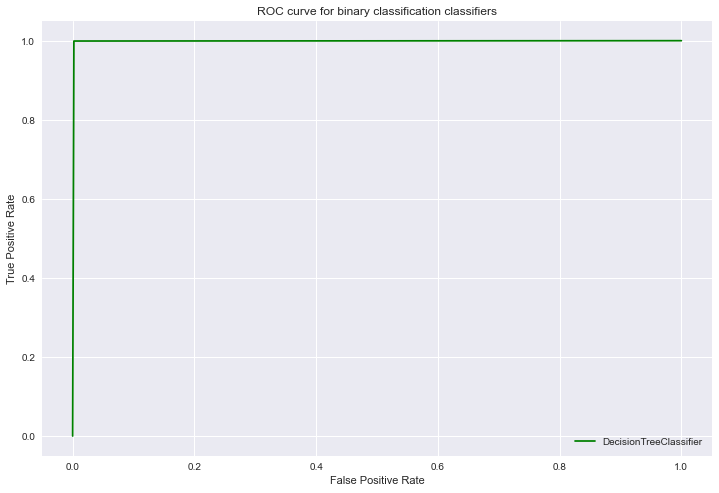

In [231]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,8))

plot_roc_curve(dt_smt, X_test, y_test, color='green',ax = ax, label='DecisionTreeClassifier')

ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for binary classification classifiers')
plt.show()

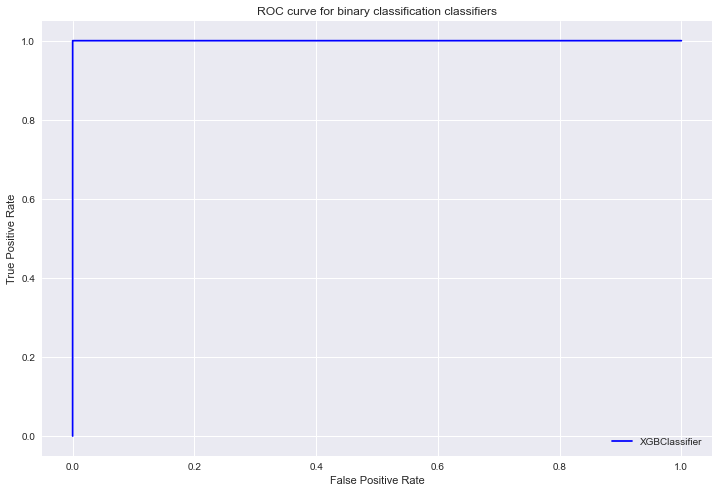

In [260]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,8))

plot_roc_curve(xgb_smt, X_test, y_test, color='blue',ax = ax, label='XGBClassifier')
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for binary classification classifiers')
plt.show()